# Colab1: Linear Regression on the Boston house dataset (DUE 6. November via Felix)
In this practical you will use a dataset that was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house dataset has 506 samples and each sample contains 13 features. The goal is to learn a linear model to predict house prices.


Your code is completely in python.


In [ ]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [ ]:
X_ = boston.data
y_ = boston.target
mu = np.mean(X_,axis=0)
sigma = np.std(X_,axis=0)
X_ = (X_ - mu)/sigma #data normalization
print(y_.shape)
print(X_.shape)

(506,)
(506, 13)


# Split the data into training: first 400 rows, and validation: rest. (10 Pts)

In [ ]:
#your code here:
X_train = X_[0:400,:]
y_train = y_[0:400]
y_train = np.reshape(y_train[0:400],(400,1))

#add column of ones in the first column
col = np.ones((400,1))
X_train = np.concatenate([col, X_train], axis = 1)

print('data training shape: ', X_train.shape)
print('target training shape: ', y_train.shape)

X_validation = X_[400:]
print(X_validation.shape)
#add column of ones in the first column
col = np.ones((106,1))
X_validation= np.concatenate([col, X_validation], axis = 1)
print('validation data shape: ', X_validation.shape)
y_validation = np.reshape(y_[400:],(106,1))

data training shape:  (400, 14)
target training shape:  (400, 1)
(106, 13)
validation data shape:  (106, 14)


# Implement the *Normal Equations* in Python to have the optimal parameters for this model. (25 Pts)

\begin{align}\boldsymbol{\hat \theta} = (X^T X)^{-1}X^T \boldsymbol{y}\end{align}
then apply the found parameters to estimate the prices for the validation data set: \begin{align}\boldsymbol{\hat y}_{validation} = X_{validation} \boldsymbol{\hat\theta}\end{align}

In [ ]:
#your code here (opt = theta_hat above):
opt = (np.linalg.inv((np.transpose(X_train)@X_train)))@np.transpose(X_train)@y_train
print(opt)
#
y_hat_validation = X_validation@opt
print(y_hat_validation)


[[23.28337581]
 [-1.643388  ]
 [ 1.0305089 ]
 [ 0.37845963]
 [ 0.43550243]
 [-1.73595149]
 [ 3.43080791]
 [ 0.07337369]
 [-2.7237948 ]
 [ 4.21699484]
 [-2.59301797]
 [-1.74926608]
 [-0.1178641 ]
 [-3.69508319]]
[[12.61850663]
 [19.78572841]
 [20.91937035]
 [13.01450693]
 [ 6.94639182]
 [ 5.12303941]
 [ 7.26186345]
 [21.83998413]
 [16.08974671]
 [24.37596059]
 [17.31065044]
 [22.85734116]
 [ 5.19256091]
 [13.00577445]
 [-3.49480533]
 [15.32299614]
 [20.10208497]
 [ 9.63027316]
 [ 6.80890367]
 [21.07620623]
 [22.82278496]
 [21.2342445 ]
 [20.82905553]
 [19.52436299]
 [20.09331136]
 [15.44875815]
 [21.5531436 ]
 [17.88962803]
 [19.81734917]
 [19.07828356]
 [23.68045913]
 [24.66708323]
 [27.11475737]
 [23.11075473]
 [21.08582662]
 [19.18303717]
 [20.70321586]
 [14.85286051]
 [10.17057277]
 [14.8513666 ]
 [13.70216217]
 [20.03720828]
 [21.48965737]
 [20.84258811]
 [14.94469636]
 [18.34178339]
 [21.34949998]
 [20.65957655]
 [19.89276593]
 [20.97828867]
 [23.92255669]
 [23.07201115]
 [21.5555

Show a scatterplot of the actual price versus predicted price.

Text(0.5, 1.0, 'Prices vs Predicted prices')

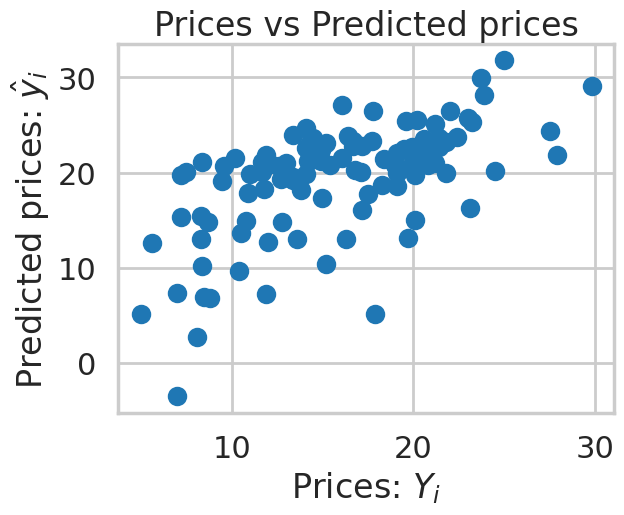

In [ ]:
#==============================================================================
plt.scatter(y_validation, y_hat_validation)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices")
#==============================================================================


# Gradient Descent (60 Pts)

> Eingerückter Textblock


Define $\theta$ as the parameter to be updated. The size is 13+1=14. Implement the linear regression by computing the gradient and update the parameters iteratively. Use approximately 1000 iterations. You can set alpha to 0.0001 Set $\theta_0$ to random numbers. Check out `np.random.random_sample`. 

---


\begin{align}
\boldsymbol{\theta}_{k +1}= \boldsymbol{\theta}_{k} - \alpha\nabla{ J(\boldsymbol{\theta})}
\end{align}
where \begin{align}\nabla J(\boldsymbol{\theta})=X^T (\boldsymbol{\hat y_k} -\boldsymbol{y})\end{align} and \begin{align}\boldsymbol{\hat y_k} = X\cdot  \boldsymbol{\theta}_{k}\end{align}



In [ ]:
#your code here
alpha = 0.0001

theta = np.random.random_sample((14,1))
num_iters = 1000

# Perform gradient descent
for i in range(num_iters):
    # Compute the predicted values for the current parameters
    y_pred = X_train @ theta
    
    # Compute the errors between predicted and target values
    errors = y_pred - y_train
    
    # Compute the gradients of the cost function with respect to theta
    gradients = np.transpose(X_train) @ errors
    
    # Update the parameters using the gradients and learning rate
    theta = theta - alpha * gradients
    
    # Print the cost function every 100 iterations
    if i % 100 == 0:
        cost = np.mean(errors ** 2)
        print(f"Iteration {i}: Cost = {cost}")

Iteration 0: Cost = 722.329443561016
Iteration 100: Cost = 27.2200738849815
Iteration 200: Cost = 24.050833220476388
Iteration 300: Cost = 23.141839996265407
Iteration 400: Cost = 22.743665900557115
Iteration 500: Cost = 22.551110022679826
Iteration 600: Cost = 22.45000964785597
Iteration 700: Cost = 22.393269643407024
Iteration 800: Cost = 22.359847707574573
Iteration 900: Cost = 22.339519858862463


In [ ]:
print(np.shape(theta), theta)

(14, 1) [[23.25047504]
 [-1.58545862]
 [ 1.00210982]
 [ 0.2796461 ]
 [ 0.45755784]
 [-1.69309148]
 [ 3.43875504]
 [ 0.05601808]
 [-2.73640717]
 [ 3.77736276]
 [-2.18865061]
 [-1.72906158]
 [-0.02387123]
 [-3.69918847]]


**What happens if you set (10 Pts)** 

1.   $\alpha= 0.01$?
2.   $\alpha= 0.00001$?

For which setting can you achieve the correct results by increasing the number of iterations?

1. the results are all 'NAN' because the steps are to big and no fitting values can be found

2. you have to increase the amount of iterations to 10000 to get to the real minimal Point because the steps are too small

# Price estimation for validation dataset (5 Pts)
Estimate again the prices for the validation dataset with the iteratively calculated $\theta$.

In [ ]:
#
y_hat_validation = X_validation @ theta

mse_val = np.mean((y_hat_validation - y_validation) ** 2)
print(f"Mean squared error on validation set: {mse_val:.2f}")

Mean squared error on validation set: 200.18


Plot again the real prices vs. predicted prices of the gradient descent procedure.

In [ ]:
plt.scatter(y_validation, y_hat_validation)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
